# Analisando Dados da Produção Hospitalar

In [104]:
# Para usar as bibliotecas pandas e matplotlib é necessário fazer a instalação usando pip install
# pip install pandas
# pip install matplotlib

# Para usar o pandas, basta importar a biblioteca para seu projeto
import pandas as pd


In [105]:
# Carregamento dos dados do arquivo CSV "sih_cnv_qiuf094147179_101_158_151 (ano-mes-processamento).csv" para o DataFrame 'dados'.
# O arquivo é lido considerando a codificação ISO-8859-1 para suportar caracteres especiais europeus.
# As três primeiras linhas e as últimas 12 linhas são ignoradas para excluir cabeçalhos longos e rodapés, respectivamente, que não são parte dos dados analíticos.
# O delimitador de campos no arquivo é definido como ponto e vírgula (;), e o motor de leitura 'python' é utilizado para permitir a opção 'skipfooter'.
dados = pd.read_csv("sih_cnv_qiuf094147179_101_158_151 (ano-mes-processamento).csv", 
                    encoding="ISO-8859-1", 
                    skiprows=3, 
                    skipfooter=12, 
                    sep=";", 
                    engine='python',
                    thousands=".",
                    decimal=",")

In [106]:
# primeiras 5 linhas do DataFrame
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,13767058.64,11273846.83,12443977.87,13054654.77,11274549.92,12082214.04,11392759.99,9603361.10,10516070.26,1394262146.50
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,4845006.75,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,-,587778407.94
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,21710028.09,22198453.04,24809424.63,25005960.66,17522338.72,19613290.58,18387673.59,14265257.60,15065867.12,2613559191.21
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,4435042.77,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,2868626.39,2077360.03,2164371.02,451170144.15
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,46925899.02,45938305.83,54094884.03,50116544.12,51268388.79,50646320.52,55501176.43,54223823.56,43689467.84,6322687933.44


In [107]:
# últimas 5 linhas do DataFrame
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,112385822.04,113809028.30,116985178.63,120027121.08,116546657.80,122325557.64,114892531.95,114464874.02,120732038.67,16750147966.65
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,26973943.11,26354221.47,26569066.08,27768462.56,28200723.03,26783833.64,27456434.20,26922668.28,23959476.62,3219624366.70
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,23431985.13,24728541.29,24130933.81,22608901.38,23329871.28,22552033.63,22790096.76,19782985.94,21462469.97,2988456549.66
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,50235627.95,44674462.22,53622374.91,51008354.28,49885683.22,50434366.44,47764974.85,50332961.30,47555420.60,6682627768.18
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,27495227.73,28258576.00,29034177.33,30961244.28,31610313.47,29140330.80,30810835.09,29465293.81,31878001.55,3543027009.96


In [108]:
# Ao executar o comando info() foi identificado que existem 3 colunas do tipo object. Na verdade, deveria existir apenas uma.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 195 entries, Unidade da Federação to Total
dtypes: float64(192), object(3)
memory usage: 41.3+ KB


In [109]:
# Verifica os tipos de dados de cada coluna do DataFrame => float, numeric, object (string) entre outros
# Nesse caso, a coluna '2024/Jan' que deveria ser float foi apresentada como object
dados.dtypes

Unidade da Federação     object
2008/Jan                float64
2008/Fev                float64
2008/Mar                float64
2008/Abr                float64
                         ...   
2023/Out                float64
2023/Nov                float64
2023/Dez                float64
2024/Jan                 object
Total                   float64
Length: 195, dtype: object

In [110]:
# Aqui usamos o método 'select_dtypes' para listar colunas do tipo 'object'
# Descobrimos que as colunas '2009/Set' e '2024/Jan' são do tipo 'object'
colunas_object = dados.select_dtypes(include=['object']).columns

print("Colunas do tipo 'object':")
print(colunas_object)

Colunas do tipo 'object':
Index(['Unidade da Federação', '2009/Set', '2024/Jan'], dtype='object')


In [111]:
# Executando o filtro apenas nas duas colunas, verificamos que é apresentado o caractere '-' na primeira linha
dados[["2009/Set", "2024/Jan"]].head(10)

,2009/Set,2024/Jan
0,3605007.43,10516070.26
1,-,-
2,9730634.16,15065867.12
3,1701611.25,2164371.02
4,27967969.22,43689467.84
5,2034329.78,3961035.17
6,6542918.14,426805.38
7,19722895.51,37885708.46
8,12247027.29,20541206.34
9,34471579.06,61814810.50


In [112]:
# Convertendo as colunas '2009/Set' e '2024/Jan' para numérico, transformando valores não convertíveis em NaN (Not a Number)
dados['2009/Set'] = pd.to_numeric(dados['2009/Set'], errors='coerce')
dados['2024/Jan'] = pd.to_numeric(dados['2024/Jan'], errors='coerce')

In [113]:
# Após a conversão, Verificamos que existe apenas uma coluna do tipo object
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 195 entries, Unidade da Federação to Total
dtypes: float64(194), object(1)
memory usage: 41.3+ KB


In [121]:
dados[["2009/Set","2024/Jan"]].dtypes

2009/Set    float64
2024/Jan    float64
dtype: object

In [115]:
dados[["2009/Set", "2024/Jan"]].head(10)

,2009/Set,2024/Jan
0,3605007.43,10516070.26
1,NaN,NaN
2,9730634.16,15065867.12
3,1701611.25,2164371.02
4,27967969.22,43689467.84
5,2034329.78,3961035.17
6,6542918.14,426805.38
7,19722895.51,37885708.46
8,12247027.29,20541206.34
9,34471579.06,61814810.50


In [116]:
# Calcula a média apenas das colunas numéricas, ignorando as colunas não numéricas
# Usei para não gerar erro por conta da primeiro coluna de Unidade da Federação
dados.mean(numeric_only=True)

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2023/Out     66941705.27
2023/Nov     65725826.24
2023/Dez     65537138.18
2024/Jan     66644175.53
Total      8578342381.93
Length: 194, dtype: float64

In [117]:
# Configura a exibição de números flutuantes no Pandas para duas casas decimais.
# Usamos o código abaixo para evitar a exibição em notação científica (4540549e+08) na exibição de saída do comando .mean()
pd.options.display.float_format = "{:.2f}".format

In [118]:
dados.mean(numeric_only=True)

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2023/Out     66941705.27
2023/Nov     65725826.24
2023/Dez     65537138.18
2024/Jan     66644175.53
Total      8578342381.93
Length: 194, dtype: float64

# Visualização de Dados com MatPlotLib

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Unidade da Federação'>

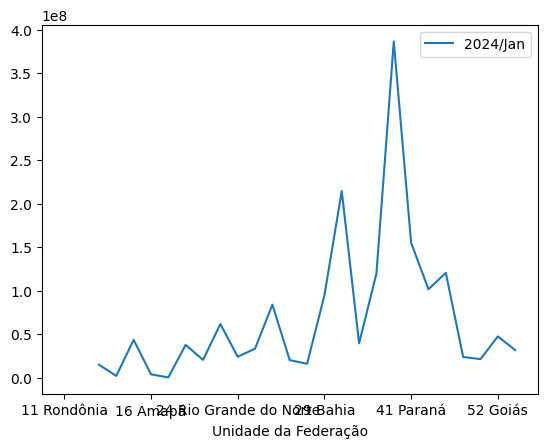

In [123]:
# exibe um gráfico de linhas (padrão) usando as colunas unidade da federação e 2024/Jan
dados.plot(x="Unidade da Federação", y="2024/Jan")

In [134]:
# Importa as bibliotecas necessárias para a criação e formatação de gráficos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

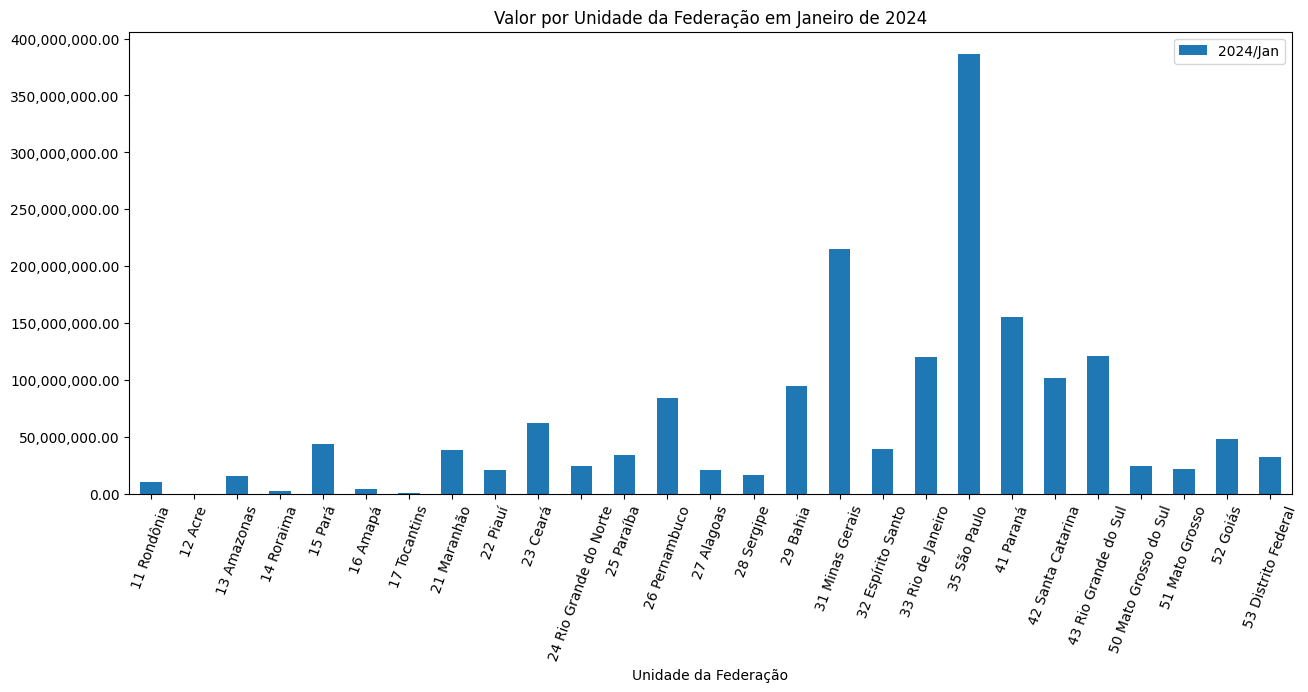

In [143]:
# Cria um gráfico de barras para visualizar os dados de '2024/Jan' por 'Unidade da Federação'.
# Configura o tamanho do gráfico através do parâmetro 'figsize'.
axis = dados.plot(x="Unidade da Federação", y="2024/Jan", kind="bar", figsize=(15,6))

# Configura o formato dos valores do eixo y para incluir separadores de milhar e decimais.
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Ajusta os rótulos do eixo x para ficarem em diagonal (45 graus, por exemplo)
#plt.xticks(rotation=70)

# Alternativamente, para uma abordagem mais customizada, você pode usar:
axis.set_xticklabels(axis.get_xticklabels(), rotation=70)

# Define o título do gráfico para melhor contextualização dos dados apresentados.
plt.title("Valor por Unidade da Federação em Janeiro de 2024")

# Exibe o gráfico configurado.
plt.show()

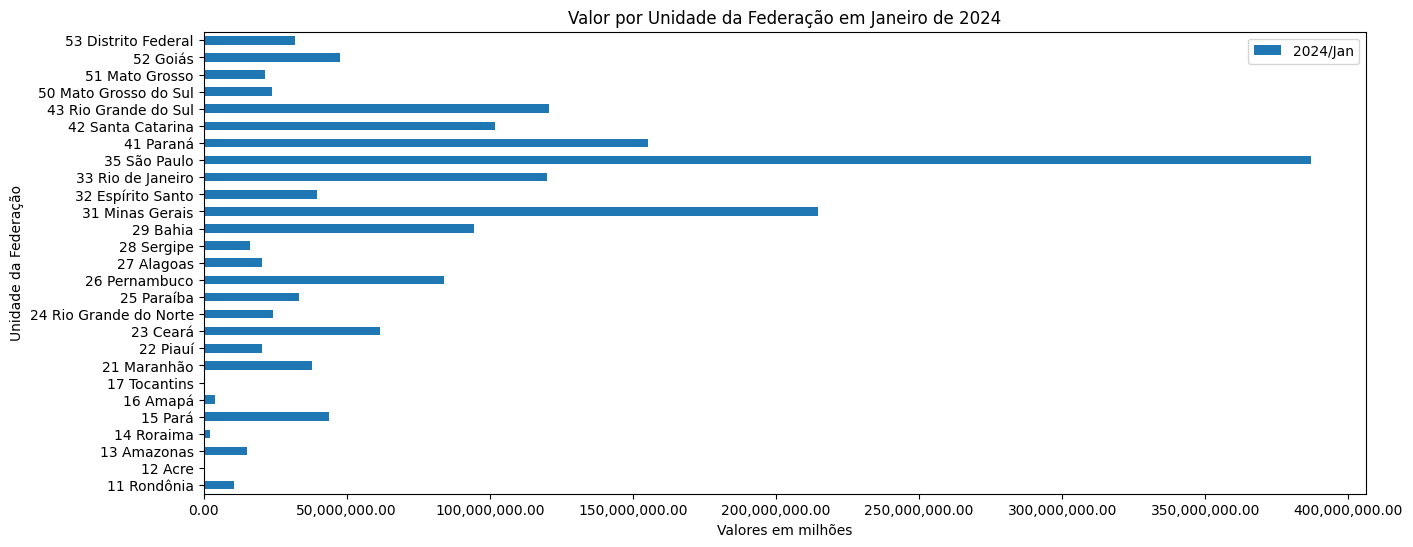

In [173]:
from matplotlib.ticker import FuncFormatter
# Sua função de formatação corrigida
def formatar_em_milhoes(x, pos):
    """Converte o valor 'x' em milhões e retorna como string."""
    return '%1.0f' % (x * 1e-6)

# Cria um gráfico de barras para visualizar os dados de '2024/Jan' por 'Unidade da Federação'.
# Configura o tamanho do gráfico através do parâmetro 'figsize'.
axis = dados.plot(x="Unidade da Federação", y="2024/Jan", kind="barh", figsize=(15,6))

# Configura o formato dos valores do eixo y para incluir separadores de milhar e decimais.
axis.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#axis.xaxis.set_major_formatter(ticker.FuncFormatter(formatar_em_milhoes))

# Define o título do gráfico para melhor contextualização dos dados apresentados.
plt.title("Valor por Unidade da Federação em Janeiro de 2024")

plt.xlabel("Valores em milhões")

# Exibe o gráfico configurado.
plt.show()